In [1]:
import time
nb_start_time = time.time()
print(time.ctime())

from keras.models import Model
from keras.layers import Input, LSTM, GRU, Bidirectional
import numpy as np
import matplotlib.pyplot as plt

Sat Mar 19 13:42:27 2022
Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
T = 8
D = 2
M = 3

In [3]:
X = np.random.randn(1, T, D)

In [4]:
X

array([[[ 0.20924716,  0.43205292],
        [ 0.26349802, -0.34376364],
        [ 0.89479158,  0.53652672],
        [-0.86710705, -1.33421444],
        [ 1.14480322, -0.14915501],
        [ 1.18832248,  0.21048534],
        [ 1.00692099, -1.34966485],
        [ 0.08648803, -0.37214922]]])

In [5]:
input_ = Input(shape=(T, D))
bi_lstm = Bidirectional(LSTM(M, return_state=True, return_sequences=True))
output = bi_lstm(input_)

Metal device set to: Apple M1


2022-03-19 13:42:29.331230: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-19 13:42:29.331309: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model = Model(inputs=input_, outputs=output)

In [7]:
o, h1, c1, h2, c2 = model.predict(X)
print("o:", o)
print("o.shape:", o.shape)
print("h1:", h1)
print("c1:", c1)
print("h2:", h2)
print("c2:", c2)

2022-03-19 13:42:29.744377: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-19 13:42:29.744521: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


o: [[[-2.65955944e-02  3.45062278e-02  6.87723011e-02 -2.00213846e-02
   -8.06086808e-02  1.30796850e-01]
  [-1.23401827e-04 -4.53030169e-02  3.77556346e-02  1.94647759e-02
   -1.93705648e-01  5.93557656e-02]
  [-6.00982495e-02 -3.75731662e-02  1.18907236e-01  1.84942465e-02
   -1.47752032e-01  7.64961243e-02]
  [ 5.30182943e-02 -1.25601351e-01 -8.92156661e-02  6.54080436e-02
   -2.94852346e-01 -7.27163777e-02]
  [ 2.47031711e-02 -1.70007229e-01  2.13542953e-02 -1.13668824e-02
   -2.41338447e-01  8.97514001e-02]
  [-4.84754778e-02 -1.67266324e-01  8.50338489e-02  3.25670466e-02
   -1.80909514e-01  7.33350366e-02]
  [ 4.40611504e-02 -3.19181025e-01  2.76031177e-02  1.21681720e-01
   -2.28572369e-01 -3.73002095e-03]
  [ 1.78767759e-02 -2.11422414e-01  5.28513920e-03  2.16977149e-02
   -5.48348874e-02 -2.07582414e-02]]]
o.shape: (1, 8, 6)
h1: [[ 0.01787678 -0.21142241  0.00528514]]
c1: [[ 0.03536855 -0.38840535  0.01186521]]
h2: [[-0.02002138 -0.08060868  0.13079685]]
c2: [[-0.03949581 -0

2022-03-19 13:42:33.382162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-19 13:42:33.411810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-19 13:42:33.418570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


#### h1 is same as the first 3 floating values of the last element of the output and h2 is same as the first element's last 3 numbers. 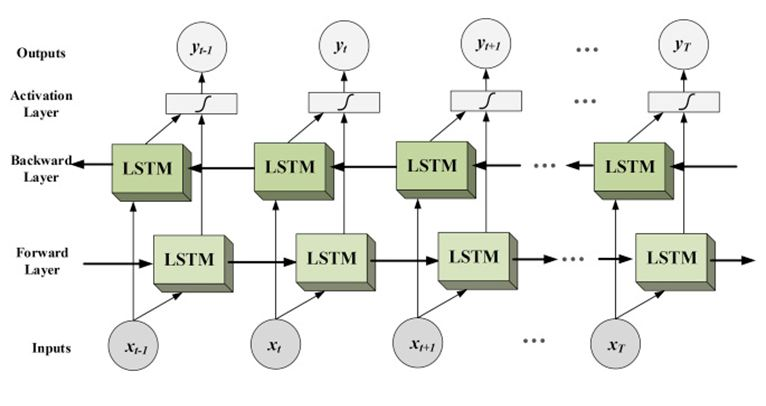

In [8]:
input_ = Input(shape=(T, D))
bi_lstm = Bidirectional(LSTM(M, return_state=True, return_sequences=False))
output = bi_lstm(input_)

model = Model(inputs=input_, outputs=output)

o, h1, c1, h2, c2 = model.predict(X)
print("o:", o)
print("o.shape:", o.shape)
print("h1:", h1)
print("c1:", c1)
print("h2:", h2)
print("c2:", c2)

o: [[ 0.09545977 -0.24275054  0.05388228 -0.0316776  -0.03627047  0.08673115]]
o.shape: (1, 6)
h1: [[ 0.09545977 -0.24275054  0.05388228]]
c1: [[ 0.20366487 -0.46887577  0.11511248]]
h2: [[-0.0316776  -0.03627047  0.08673115]]
c2: [[-0.06156578 -0.07937213  0.1773268 ]]


2022-03-19 13:42:33.793768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-19 13:42:33.821982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-19 13:42:33.829780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [ ]:
#### First half of the output is same as the h1 and the last half same as h2